## Problem 5
### Question b

In [2]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

C:\Users\Santiago\AppData\Local\Temp\ipykernel_3496\1686729024.py:15: RuntimeWarning: overflow encountered in double_scalars
  v[i+1, 1] = (eta * (1 - u[i+1, 0] * u[i+1, 0]) * u[i+1, 1] - k * u [i+1, 0])/ m
C:\Users\Santiago\AppData\Local\Temp\ipykernel_3496\1686729024.py:13: RuntimeWarning: invalid value encountered in double_scalars
  u[i+1, 1] = u[i,1] + h * ((1-gamma) * v[i,1] + gamma * v[i+1,1])


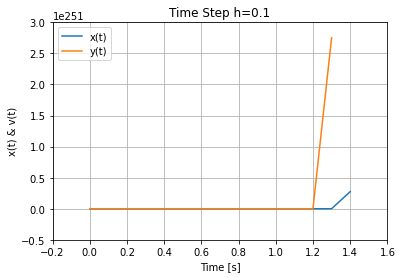

In [5]:
def odesolver(x0, t_start, t_end, h, gamma):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    # Initial values
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    # Use of Foarward Euler
    for i in range(time.shape[0] - 1):
        u[i+1, 0] = u[i,0] + h * ((1-gamma) * v[i,0] + gamma * v[i+1,0])
        u[i+1, 1] = u[i,1] + h * ((1-gamma) * v[i,1] + gamma * v[i+1,1])
        v[i+1, 0] = u[i+1,1]
        v[i+1, 1] = (eta * (1 - u[i+1, 0] * u[i+1, 0]) * u[i+1, 1] - k * u [i+1, 0])/ m
    return time, u, v

# Initial Conditions
x0 = np.array([[1, 0], [0, -1]])
# Start Time, End time
tInitial, tFinal, h = 0, 2500, 0.1
# Coefficients
m, k, eta = 1, 1, 500
# Computing using Forward Euler
time, u, v = odesolver(x0, tInitial, tFinal, h, 0)
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Time Step h=0.1")
# Plot Curves
ax.plot(time, u[:, 0], label="x(t)")
ax.plot(time, u[:, 1], label="y(t)")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel("x(t) & v(t)")
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question c and d

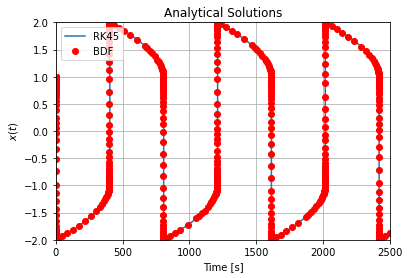

In [6]:
def dydt(t, y):
    eta = 500
    return [y[1], eta * ( 1 - y[0] ** 2) * y[1] - y[0]]

# Using solve_ivp with 'RK45' method
sol_RK45 = solve_ivp(dydt, [0, 2500], [1, 0], method='RK45')
# Using solve_ivp with 'BDF' method
sol_BDF = solve_ivp(dydt, [0, 2500], [1, 0], method='BDF')

# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Analytical Solutions")
# Plot Curves
ax.plot(sol_RK45.t, sol_RK45.y[0], label="RK45")
ax.plot(sol_BDF.t, sol_BDF.y[0], 'o', color="red", label="BDF")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$')
# Axes values to show
ax.set_xlim((0, 2500))
ax.set_ylim((-2, 2))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)